In [28]:
# import modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler

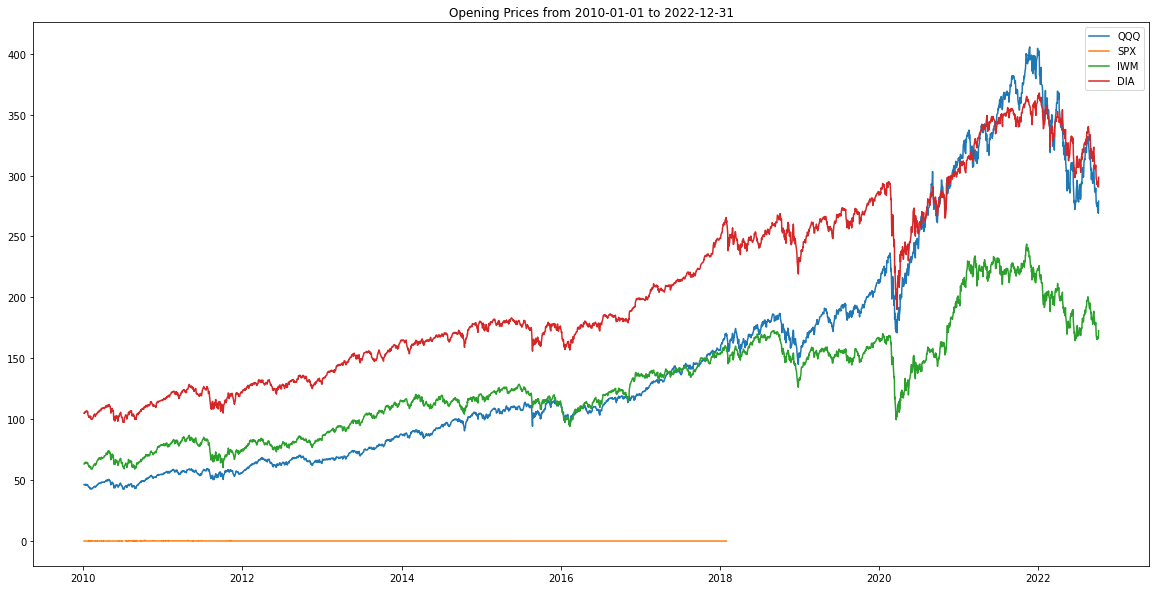

In [3]:
# initializing Parameters
start = "2010-01-01"
end = "2022-12-31"
symbols = ["QQQ","SPX","IWM", "DIA"]

# Getting the data
all_data = pdr.get_data_yahoo(symbols, start, end)

# Display all stocks
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start, end))
plt.plot(all_data['Open'])
plt.legend(symbols)
plt.show()

## Enrich data

In [4]:
stock_dict = {}

for symbol in symbols:
    data = pdr.get_data_yahoo(symbol, start, end)

    # get percent change
    data['daily_change'] = ((data.Close - data.shift().Close) / data.Close) * 100
    data['weekly_change'] = ((data.Close - data.shift(freq='7D').Close) / data.Close) * 100
    data['monthly_change'] = ((data.Close - data.shift(freq='30D').Close) / data.Close) * 100

    # get moving averages
    data['MA_30'] = data.Close.rolling(window=30).mean()
    data['MA_200'] = data.Close.rolling(window=200).mean()
    
    # get moving volatility
    data['M_vol_30'] = data.Close.rolling(window=30).std()
    data['M_vol_200'] = data.Close.rolling(window=200).std()
        
    data.dropna(inplace=True)
    
    stock_dict[symbol] = data 
    
stock_dict['QQQ'].tail(5)

,High,Low,Open,Close,Volume,Adj Close,daily_change,weekly_change,monthly_change,MA_30,MA_200,M_vol_30,M_vol_200
Date,,,,,,,,,,,,,
2022-09-22,283.029999,278.820007,282.000000,280.070007,62757100.0,280.070007,-1.246114,-3.938301,-12.150533,306.504331,330.176349,15.595349,35.310301
2022-09-23,277.850006,272.019989,277.549988,275.510010,74705400.0,275.510010,-1.655111,-5.012521,-14.337047,304.885332,329.564749,16.216576,35.191739
2022-09-28,281.250000,272.950012,274.459991,279.940002,79652100.0,279.940002,1.950415,-1.293132,-8.741159,299.320665,327.751949,15.514784,34.773577
2022-09-29,276.250000,268.839996,275.859985,271.869995,81216000.0,271.869995,-2.968333,-3.016152,-10.722034,297.433332,327.149999,15.286208,34.693211
2022-09-30,275.190002,267.100006,271.029999,267.260010,78348500.0,267.260010,-1.724907,-3.086882,-11.977093,295.365999,326.545299,15.022259,34.677751
